# import

In [22]:
%matplotlib inline
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

## os path

In [23]:
import os
print(os.getcwd())

D:\jupyter_notebook\captcha_breaker-master\captcha_breaker-master\2_img_processing


## 0-1. BGR 原圖

In [24]:
def img_show(img):
    fig = plt.figure() # 建立一個Figure（空的顯示區） 
    print("shape = ",img.shape)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.show()

shape =  (120, 400, 3)


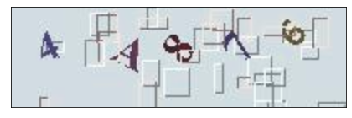

In [25]:
img = cv2.imread('./datasets/4A876.png', cv2.IMREAD_COLOR)
img_show(img)

## 0-2. RGB 原圖 (BGR2RGB)

shape =  (120, 400, 3)


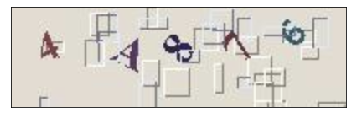

In [26]:
img = cv2.imread('./datasets/4A876.png') #讀進來BGR
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #BGR編碼轉 RGB 

# FFFFFF (255,255,255) 全彩 ( 24bit = 3Bytes ) 2^4 * 2^4 = 2^8(8 bit = 1 Bytes = 1色)
# 1 Bytes = 8 bit
# 以長640像素、寬480像素的圖檔為例
# 全彩 ( 24bit = 3Bytes ) 256 * 256 * 256 = 16,777,216 色
# 640 * 480 * 3Bytes = 921,600 Bytes = 900 Kb (921600/1024)

img_show(img)

## 1. 轉灰階讀入

shape =  (120, 400)


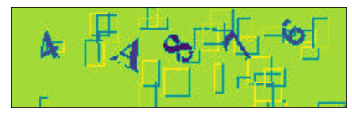

In [27]:
img = cv2.imread('datasets/4A876.png', 0) # 灰階
img_show(img)

# 2. 形態學轉換
https://codertw.com/%E7%A8%8B%E5%BC%8F%E8%AA%9E%E8%A8%80/445994/
https://blog.csdn.net/hjxu2016/article/details/77837765
腐蝕膨脹、開閉運算
使用這三個函式cv2.erode()，cv2.dilate()，cv2.morphologyEx()
內有圖例:https://www.kancloud.cn/aollo/aolloopencv/270208
圖片範例與說明: https://www.jianshu.com/p/dcecaf62da71


(1) 腐蝕 cv2.erode()

腐蝕操作會把前景物體的邊緣腐蝕掉。原理是卷積核沿著影象滑動，如果與卷積核對應的原影象畫素值都是1，那麼中心元素保持原值，否則為0.
效果，靠近前景的畫素被腐蝕為0，前景物體變小，影象白色區域減少，對於去除白噪聲很有用，可以斷開兩個連線在一起的物體。
（影象當中的白噪聲大概意思就是隨機噪聲）

(2) 膨脹 cv2.dilate()
與腐蝕相反，卷積核當中只要有一個值是1，中心元素值就是1。此操作會增加前景中的白色區域，一般早去噪聲的時候都是先腐蝕再膨脹，腐蝕的過程會使得前景變小，使用膨脹操作使前景變換回來。膨脹也可以使相互分離的物體連線。

(1+2) 開運算 

就是先腐蝕再膨脹，一般用來去除噪聲
先进行腐蚀再进行膨胀就叫做开运算。被用来去除噪音，函数可以使用cv2.morphotogyEx()

opening = cv2.morphotogyEx(img,cv2.MORPH_OPEN,kernel)

(2+1) 闭运算
先膨胀再腐蚀。被用来填充前景物体中的小洞，或者前景上的小黑点。

closing = cv2.morphotogyEx(img,cv2.MORPH_CLOSE,kernel)

(3) 形态学梯度
其实就是一幅图像膨胀与腐蚀的差别。
结果看上去就像前景物体的轮廓。

gradient = cv2.morphotogyEx(img,cv2.MORPH_GRADIENT,kernel)

## 2-1. erosion 加深圖片

[[1]]
shape =  (120, 400)


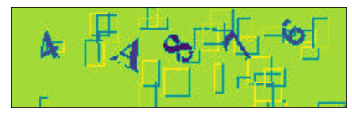

In [28]:
kernel = np.ones((1,1), np.uint8)
print(kernel)
erosion = cv2.erode(img, kernel, iterations=1) # 加深圖片
img_show(erosion)

[[1 1 1]
 [1 1 1]
 [1 1 1]]
shape =  (120, 400)


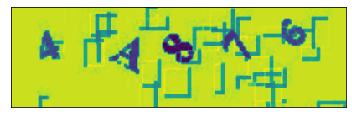

In [29]:
## 3-1-2. 測試不同erosion
kernel = np.ones((3,3),np.uint8)
print(kernel)
erosion2 = cv2.erode(img, kernel, iterations=1) # 加深圖片
img_show(erosion2)

## 2-2. dilation

shape =  (120, 400)


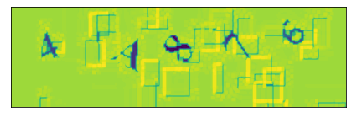

In [30]:
dilation = cv2.dilate(img, kernel, iterations=1)
img_show(dilation)

## 2-3. morphologyEx

shape =  (120, 400)


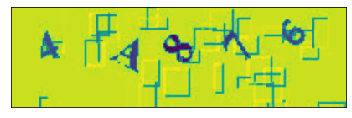

In [31]:
# (1+2) 開運算 
# 就是先腐蝕再膨脹，一般用來去除噪聲
# 先进行腐蚀再进行膨胀就叫做开运算。被用来去除噪音，函数可以使用cv2.morphotogyEx()
# 先进性腐蚀再进行膨胀就叫做开运算。就像我们上面介绍的那样，它被用来去除噪声。这里我们用到的函数是cv2.morphologyEx()。

opening = cv2.morphologyEx(img,cv2.MORPH_OPEN,kernel)
img_show(opening)

shape =  (120, 400)


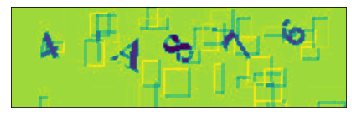

In [32]:
# (2+1) 闭运算
# 先膨胀再腐蚀。被用来填充前景物体中的小洞，或者前景上的小黑点。
# 先膨胀再腐蚀。它经常被用来填充前景物体中的小洞，或者前景物体上的小黑点。

closing = cv2.morphologyEx(img,cv2.MORPH_CLOSE,kernel)
img_show(closing)

shape =  (120, 400)


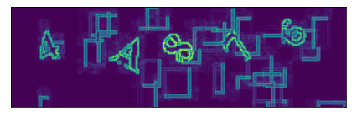

In [33]:
# (3) 形态学梯度
# 其实就是一幅图像膨胀与腐蚀的差别。
# 结果看上去就像前景物体的轮廓。

# 5.形态梯度
# 这个和腐蚀以及膨胀不同，结果看上去像是物体的轮廓。

gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
img_show(gradient)

shape =  (120, 400)


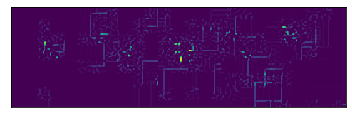

In [34]:
# 6.顶帽
# 这个是输入图片和图片的开运算结果的差别，下面是9x9的核的

tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
img_show(tophat)

shape =  (120, 400)


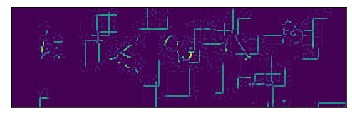

In [35]:
# 7.黑帽
# 这是输入图片的闭的结果和输入图片的差别。

blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)
img_show(blackhat)

## 4-1. 圖片轉成list 

<class 'numpy.ndarray'>
(120, 400)
120
shape =  (120, 400)


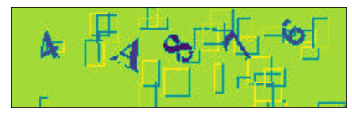

In [36]:
img_list = [] 
print(type(erosion))
print(erosion.shape) # numpy
print(len(erosion))

for i in erosion:
    for j in i:
        img_list.append(j) # 存入 img_list 
        
img_new = np.asarray(img_list)
img_new = img_new.reshape(120, 400)
img_show(img_new)     

## 5-1. 去除淺色部分, 加深深色部分 (threshold 圖片二值化)

shape =  (120, 400)


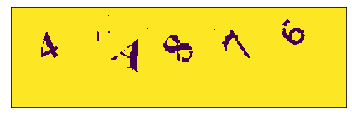

In [37]:
for i, j in enumerate(img_list):
    if j < 120:
        img_list[i] = 0
    else:
        img_list[i] = 255
        
img_new = np.asarray(img_list)
img_new = img_new.reshape(120, 400)
img_show(img_new)

## 5-2. threshold 圖片二值化
https://codertw.com/%E7%A8%8B%E5%BC%8F%E8%AA%9E%E8%A8%80/541607/

shape =  (120, 400)


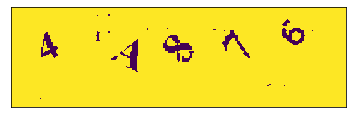

shape =  (120, 400)


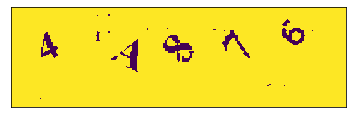

shape =  (120, 400)


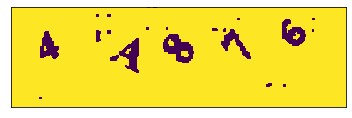

In [38]:
ret1, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
img_show(thresh1)
ret2, thresh2 = cv2.threshold(erosion, 127, 255, cv2.THRESH_BINARY)
img_show(thresh2)
ret3, thresh3 = cv2.threshold(erosion2, 127, 255, cv2.THRESH_BINARY)
img_show(thresh3)

## 6-1. 儲存圖片

In [39]:
import os
if not os.path.exists("result-save"): 
    os.mkdir("result-save")

In [49]:
def img_save(img, img_name):
    fig = plt.figure()
#     print(img.shape)
    print("shape = ",img.shape)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    file_name = 'result-save/' + str(img_name)
    fig.savefig(file_name, bbox_inches='tight', pad_inches=0)
    cv_name = file_name + ".png"
    cv2.imwrite(cv_name, img)
    plt.show()

shape =  (120, 400)


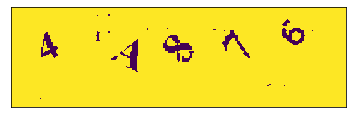

In [50]:
img_save(thresh2, 'result')

## 7. findContours 找邊框

圖片範例：https://www.itread01.com/content/1548208277.html

https://blog.csdn.net/dcrmg/article/details/51987348
https://blog.csdn.net/hjxu2016/article/details/77833336

引數mode的意義

mode的值決定把找到的輪廓如何掛到輪廓樹節點變數(h_prev, h_next, v_prev, v_next)上。圖2展示了四種可能的mode值所得到的結果的拓撲結構。
每種情況下，結構都可以看成是被橫向連線(h_prev, h_next)聯絡和被縱向連線(v_prev, v_next)不同層次。
![](1.png)
* CV_RETR_EXTERNAL 只檢測出最外輪廓即c0。圖2中第一個輪廓指向最外的序列，除此之外沒有別的連線。
* CV_RETR_LIST 檢測出所有的輪廓並將他們儲存到表(list)中，圖2中描繪了這個表，被找到的9條輪廓相互之間由h_prev和h_next連線。這裡並沒有表達出縱向的連線關係，沒有使用v_prev和v_next.
* CV_RETR_COMP 檢測出所有的輪廓並將他們組織成雙層的結構，第一層是外部輪廓邊界，第二層邊界是孔的邊界。從圖2可以看到5個輪廓的邊界，其中3個包含孔。最外層邊界c0有兩個孔，c0之間的所有孔相互間由h_prev和h_next指標連線。
* CV_RETR_TREE 檢測出所有輪廓並且重新建立網狀的輪廓結構。圖2中，根節點是最外層的邊界c0，c0之下是孔h00，在同一層中與另一個孔h01相連線。同理，每個孔都有子節點(相對於c000和c010)，這些子節點和父節點被垂直連線起來。這個步驟一直持續到影象最內層的輪廓，這些輪廓會成為樹葉節點。

method的五個值

* CV_CHAIN_CODE 用freeman鏈碼輸出輪廓，其他方法輸出多邊形(頂點的序列)。
![image.png](2.png)
* CV_CHAIN_APPROX_NONE將鏈碼編碼中的所有點轉換為點。
* CV_CHAIN_APPROX_SIMPLE壓縮水平，垂直或斜的部分，只儲存最後一個點。
![image.png](3.png)
* CV_CHAIN_APPROX_TC89_L1，CV_CHAIN_QPPROX_TC89_KCOS使用Teh-Chin鏈逼近演算法中的一個。
* CV_LINK_RUNS與上述的演算法完全不同，連線所有的水平層次的輪廓。

第一个参数：image，单通道图像矩阵，可以是灰度图，但更常用的是二值图像，一般是经过Canny、拉普拉斯等边缘检测算子处理过的二值图像；

第二个参数：contours，定义为“vector<vector<Point>> contours”，是一个向量，并且是一个双重向量，向量内每个元素保存了一组由连续的Point点构成的点的集合的向量，每一组Point点集就是一个轮廓。有多少轮廓，向量contours就有多少元素。

第三个参数：hierarchy，定义为“vector<Vec4i> hierarchy”，先来看一下Vec4i的定义：typedef Vec<int, 4> Vec4i;                                                                                                                                       
Vec4i是Vec<int,4>的别名，定义了一个“向量内每一个元素包含了4个int型变量”的向量。
所以从定义上看，hierarchy也是一个向量，向量内每个元素保存了一个包含4个int整型的数组。
向量hiararchy内的元素和轮廓向量contours内的元素是一一对应的，向量的容量相同。
hierarchy向量内每一个元素的4个int型变量——hierarchy[i][0] ~hierarchy[i][3]，分别表示第i个轮廓的后一个轮廓、前一个轮廓、父轮廓、内嵌轮廓的索引编号。如果当前轮廓没有对应的后一个轮廓、前一个轮廓、父轮廓或内嵌轮廓的话，则hierarchy[i][0] ~hierarchy[i][3]的相应位被设置为
默认值-1。

原文链接：https://blog.csdn.net/dcrmg/java/article/details/51987348

In [51]:
# findContours
img2, contours, hierarchy = cv2.findContours(thresh2, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
# contours, hierarchy = cv2.findContours(thresh2, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

## opencv-python中 boundingRect（cnt）以及cv2.rectangle用法
https://blog.csdn.net/qq_19707521/article/details/78367684
https://blog.csdn.net/hjxu2016/article/details/77833984

利用cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)画出矩行

参数解释
第一个参数：img是原图
第二个参数：（x，y）是矩阵的左上点坐标
第三个参数：（x+w，y+h）是矩阵的右下点坐标
第四个参数：（0,255,0）是画线对应的rgb颜色
第五个参数：2是所画的线的宽度

## 方框
https://blog.gtwang.org/programming/opencv-drawing-functions-tutorial/
繪製方框可以使用 cv2.rectangle 函數：

cv2.rectangle(影像, 頂點座標, 對向頂點座標, 顏色, 線條寬度)
這裡的線條寬度參數若設定為正的值，則代表正常的線條寬度，而若設定為負的值，則代表畫實心的方框。

以下是接續上面的範例，再加上一個方框的程式碼：

shape =  (120, 400)


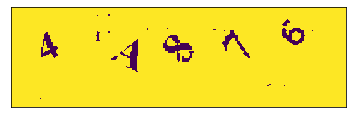

[x,y,w,h] = [129, 38, 24, 42]
shape =  (62, 44)


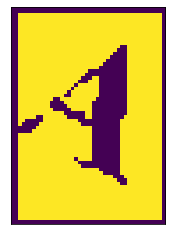

[x,y,w,h] = [181, 33, 36, 34]
shape =  (54, 56)


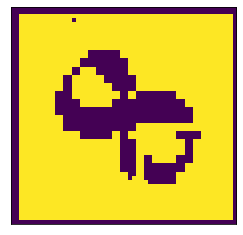

[x,y,w,h] = [35, 30, 22, 33]
shape =  (53, 42)


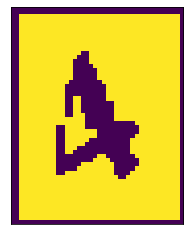

[x,y,w,h] = [251, 27, 35, 36]
shape =  (56, 55)


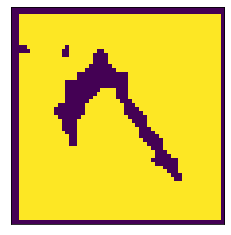

[x,y,w,h] = [323, 25, 29, 22]
shape =  (42, 49)


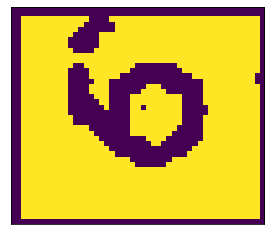

[x,y,w,h] = [0, 0, 400, 120]
shape =  (10, 10)


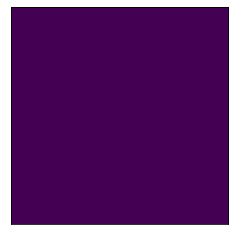

shape =  (120, 400)


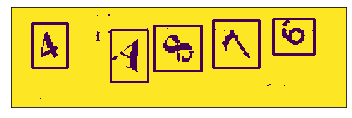

In [52]:
img_show(thresh2)

# print(len(contours))
# for ele in contours:   
#     print(ele)

# print(hierarchy)

cnt = 0
for ele in contours:        
    [x,y,w,h] = cv2.boundingRect(ele) #多邊形轉方形
#     print(j)
#     print([x,y,w,h])    
    if  h > 20: # 文字至少要有超過"20"的高度 (不夠高 = 誤判)
        print("[x,y,w,h] =",[x,y,w,h])
        
        # 各邊緣加大 10 pixels
        # 方框劃上去
        cv2.rectangle(thresh2, (x - 10, y - 10), (x + w + 10, y + h + 10), (0, 0, 0), 2)
        # 截圖(方框)
        roi = thresh2[y - 10 : y + h + 10, x - 10 : x + w + 10]
#         img_show(roi)        
        img_save(roi, cnt)
        cnt = cnt + 1

#         roismall = cv2.resize(roi, (10, 10))
#         img_show(roismall)
#         roismall = roismall.reshape((1, 100))
#         roismall = np.float32(roismall)
        

img_save(thresh2, 'thresh2') # 儲存框起來後的圖

##  threshold 圖片二值化 其他測試
https://codertw.com/%E7%A8%8B%E5%BC%8F%E8%AA%9E%E8%A8%80/541607/

shape =  (120, 400)


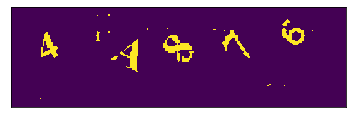

shape =  (120, 400)


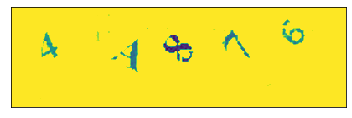

shape =  (120, 400)


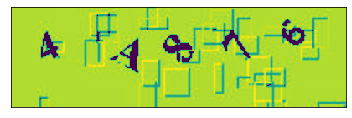

shape =  (120, 400)


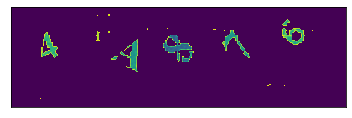

In [53]:
ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV) # 將大於閾值的灰度值設為0，其他值設為最大灰度值。>127 =0, <127 =255
img_show(thresh)
ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC) # 將大於閾值的灰度值設為閾值，小於閾值的值保持不變。 >127 =127
img_show(thresh)
ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO) # 將小於閾值的灰度值設為0，大於閾值的值保持不變。 <127 =0
img_show(thresh)
ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV) # 將大於閾值的灰度值設為0，小於閾值的值保持不變。 >127 =0
img_show(thresh)

## medianBlur 模糊化

shape =  (120, 400)


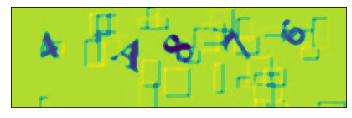

In [54]:
img = cv2.medianBlur(img, 5)
img_show(img)

## threshold 模糊後圖片二值化

shape =  (120, 400)


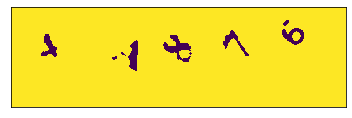

In [55]:
ret, thresh = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY)
img_show(thresh)

## threshold 自適應圖片二值化
https://blog.csdn.net/sinat_21258931/article/details/61418681
https://codertw.com/%E7%A8%8B%E5%BC%8F%E8%AA%9E%E8%A8%80/433357/

shape =  (120, 400)


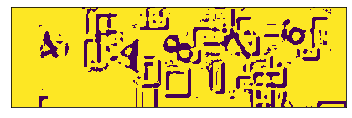

shape =  (120, 400)


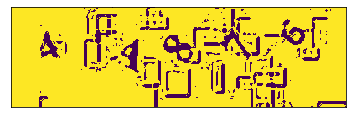

In [56]:
thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2) #平均
img_show(thresh)
thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2) #高斯平均
img_show(thresh)

shape =  (120, 400)


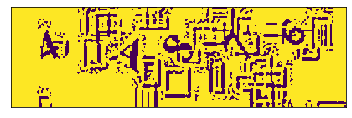

shape =  (120, 400)


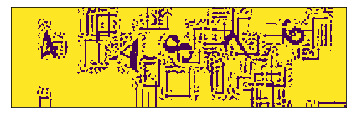

In [57]:
thresh = cv2.adaptiveThreshold(erosion, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2) #平均
img_show(thresh)
thresh = cv2.adaptiveThreshold(erosion, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2) #高斯平均
img_show(thresh)